In [1]:
import sys
sys.path.append("..")

In [2]:
import mytorch
train_set = mytorch.datasets.MNIST(train=True, transform=None)
test_set = mytorch.datasets.MNIST(train=False, transform=None)


In [3]:
x, t = train_set[0]
print(type(x), x.shape)
print(t)

<class 'numpy.ndarray'> (1, 28, 28)
5


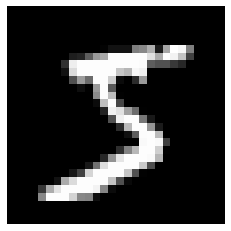

label: 5


In [4]:
import matplotlib.pyplot as plt

x, t = train_set[0]
plt.imshow(x.reshape(28, 28), cmap='gray')
plt.axis('off')
plt.show()
print('label:', t)

In [5]:
def f(x):
    x = x.flatten()
    x = x.astype(np.float32)
    x /= 255.0
    return x


train_set = mytorch.datasets.MNIST(train=True, transform=f)
test_set = mytorch.datasets.MNIST(train=False, transform=f)

# 51.2 MNIST 학습하기

In [6]:
import matplotlib.pyplot as plt

import numpy as np

import mytorch
from mytorch import DataLoader
from mytorch import optimizers
from mytorch import functions as F
from mytorch.models import MLP

max_epoch = 30
batch_size = 100
hidden_size = 100
train_set = mytorch.datasets.MNIST(train=True)
test_set = mytorch.datasets.MNIST(train=False)

train_loader = DataLoader(train_set, batch_size)
test_loader = DataLoader(test_set, batch_size, shuffle=False)

model = MLP((hidden_size, 10))
optim = optimizers.SGD(model.parameters)


train_loss_saver = []
test_loss_saver = []
train_acc_saver = []
test_acc_saver = []

for epoch in range(max_epoch):
    sum_loss, sum_acc = 0, 0
    for x, t in train_loader:
        pred = model(x)
        loss = F.softmax_cross_entropy(pred, t)
        acc = F.accuracy(pred, t)
        
        model.zerograd()
        loss.backward()
        optim.step()
        
        sum_loss += float(loss.data) * len(t)
        sum_acc += float(acc.data) * len(t)
    train_loss_saver.append((epoch, sum_loss / len(train_set)))
    train_acc_saver.append((epoch, sum_acc / len(train_set)))
    print(f"[{epoch+1}/{max_epoch}] train_loss: {sum_loss / len(train_set)}, "
          f"accuracy: {sum_acc / len(train_set)}")
    
    sum_loss, sum_acc = 0, 0
    with mytorch.no_grad():
        for x, t in test_loader:
            pred = model(x)
            loss = mytorch.functions.softmax_cross_entropy(pred, t)
            acc = mytorch.functions.accuracy(pred, t)
            sum_loss += float(loss.data) * len(t)
            sum_acc += float(acc.data) * len(t)
        test_loss_saver.append((epoch, sum_loss / len(test_set)))
        test_acc_saver.append((epoch, sum_acc / len(test_set)))
        print(f"test_loss: {sum_loss / len(test_set)}, "
              f"accuracy: {sum_acc / len(test_set)}")
        

[1/30] train_loss: 2.0812619783480963, accuracy: 0.5233166666666667
test_loss: 1.8423086631298065, accuracy: 0.665
[2/30] train_loss: 1.6169356840848923, accuracy: 0.7151666666666666
test_loss: 1.380177787542343, accuracy: 0.7645
[3/30] train_loss: 1.217434067428112, accuracy: 0.77955
test_loss: 1.0496041321754455, accuracy: 0.8121
[4/30] train_loss: 0.95889673858881, accuracy: 0.81755
test_loss: 0.8502231255173683, accuracy: 0.8345
[5/30] train_loss: 0.800972338616848, accuracy: 0.8373833333333334
test_loss: 0.72513468593359, accuracy: 0.8524
[6/30] train_loss: 0.698879144291083, accuracy: 0.8502666666666666
test_loss: 0.6417671573162079, accuracy: 0.8634
[7/30] train_loss: 0.6284567311406135, accuracy: 0.8604833333333334
test_loss: 0.5821327874064446, accuracy: 0.8716
[8/30] train_loss: 0.5771204340954622, accuracy: 0.8681166666666666
test_loss: 0.5378376831114292, accuracy: 0.8781
[9/30] train_loss: 0.5380581536889076, accuracy: 0.87275
test_loss: 0.5036256696283817, accuracy: 0.882

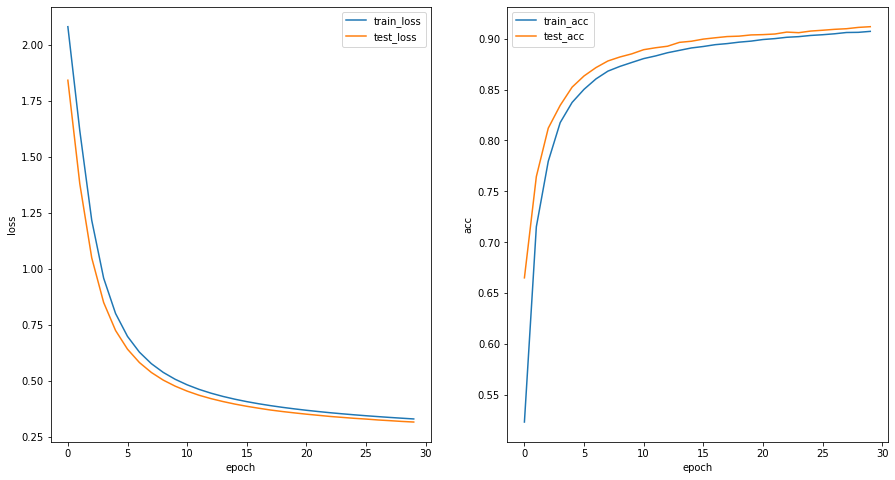

In [7]:
fig, ax = plt.subplots(figsize=(15, 8), nrows=1, ncols=2)
train_loss_saver = np.array(train_loss_saver)
test_loss_saver = np.array(test_loss_saver)
ax[0].plot(train_loss_saver[:, 0], train_loss_saver[:, 1], label='train_loss')
ax[0].plot(test_loss_saver[:, 0], test_loss_saver[:, 1], label='test_loss')
ax[0].set_xlabel("epoch")
ax[0].set_ylabel("loss")
ax[0].legend()

train_acc_saver = np.array(train_acc_saver)
test_acc_saver = np.array(test_acc_saver)
ax[1].plot(train_acc_saver[:, 0], train_acc_saver[:, 1], label='train_acc')
ax[1].plot(test_acc_saver[:, 0], test_acc_saver[:, 1], label='test_acc')
ax[1].set_xlabel("epoch")
ax[1].set_ylabel("acc")
ax[1].legend()
plt.show()

In [8]:
import matplotlib.pyplot as plt

import numpy as np

import mytorch
from mytorch import DataLoader
from mytorch import optimizers
from mytorch import functions as F
from mytorch.models import MLP

max_epoch = 30
batch_size = 100
hidden_size = 100
train_set = mytorch.datasets.MNIST(train=True)
test_set = mytorch.datasets.MNIST(train=False)

train_loader = DataLoader(train_set, batch_size)
test_loader = DataLoader(test_set, batch_size, shuffle=False)

model = MLP((hidden_size, hidden_size, 10), activation=F.relu)
optim = optimizers.SGD(model.parameters)


relu_train_loss_saver = []
relu_test_loss_saver = []
relu_train_acc_saver = []
relu_test_acc_saver = []

for epoch in range(max_epoch):
    sum_loss, sum_acc = 0, 0
    for x, t in train_loader:
        pred = model(x)
        loss = F.softmax_cross_entropy(pred, t)
        acc = F.accuracy(pred, t)
        
        model.zerograd()
        loss.backward()
        optim.step()
        
        sum_loss += float(loss.data) * len(t)
        sum_acc += float(acc.data) * len(t)
    relu_train_loss_saver.append((epoch, sum_loss / len(train_set)))
    relu_train_acc_saver.append((epoch, sum_acc / len(train_set)))
    print(f"[{epoch+1}/{max_epoch}] train_loss: {sum_loss / len(train_set)}, "
          f"accuracy: {sum_acc / len(train_set)}")
    
    sum_loss, sum_acc = 0, 0
    with mytorch.no_grad():
        for x, t in test_loader:
            pred = model(x)
            loss = mytorch.functions.softmax_cross_entropy(pred, t)
            acc = mytorch.functions.accuracy(pred, t)
            sum_loss += float(loss.data) * len(t)
            sum_acc += float(acc.data) * len(t)
        relu_test_loss_saver.append((epoch, sum_loss / len(test_set)))
        relu_test_acc_saver.append((epoch, sum_acc / len(test_set)))
        print(f"test_loss: {sum_loss / len(test_set)}, "
              f"accuracy: {sum_acc / len(test_set)}")
        

[1/30] train_loss: 1.3082931859294573, accuracy: 0.6799333333333333
test_loss: 0.6059540909528732, accuracy: 0.8507
[2/30] train_loss: 0.49491497325400513, accuracy: 0.8700166666666667
test_loss: 0.39755174063146115, accuracy: 0.8926
[3/30] train_loss: 0.38051303719480833, accuracy: 0.89405
test_loss: 0.33910174686461686, accuracy: 0.9037
[4/30] train_loss: 0.3349747328956922, accuracy: 0.9053833333333333
test_loss: 0.30557411786168814, accuracy: 0.9117
[5/30] train_loss: 0.30751386113464835, accuracy: 0.9132666666666667
test_loss: 0.2845022578723729, accuracy: 0.9203
[6/30] train_loss: 0.2873156846066316, accuracy: 0.9184
test_loss: 0.2691362980939448, accuracy: 0.9211
[7/30] train_loss: 0.2710467141369979, accuracy: 0.9227666666666666
test_loss: 0.2571101698372513, accuracy: 0.9267
[8/30] train_loss: 0.25765669137239455, accuracy: 0.92685
test_loss: 0.24413067439571023, accuracy: 0.9314
[9/30] train_loss: 0.24523452057192724, accuracy: 0.9304166666666667
test_loss: 0.2364716930594295

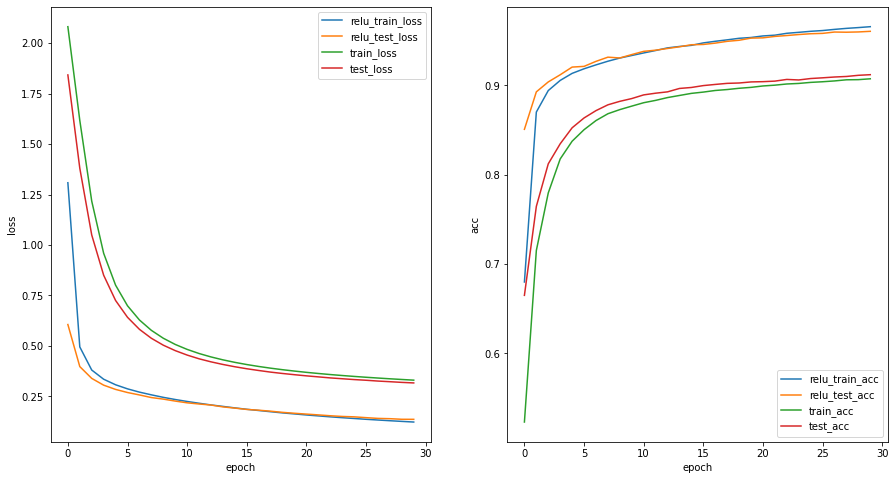

In [9]:
fig, ax = plt.subplots(figsize=(15, 8), nrows=1, ncols=2)
relu_train_loss_saver = np.array(relu_train_loss_saver)
relu_test_loss_saver = np.array(relu_test_loss_saver)
ax[0].plot(relu_train_loss_saver[:, 0], relu_train_loss_saver[:, 1], label='relu_train_loss')
ax[0].plot(relu_test_loss_saver[:, 0], relu_test_loss_saver[:, 1], label='relu_test_loss')
ax[0].plot(train_loss_saver[:, 0], train_loss_saver[:, 1], label='train_loss')
ax[0].plot(test_loss_saver[:, 0], test_loss_saver[:, 1], label='test_loss')
ax[0].set_xlabel("epoch")
ax[0].set_ylabel("loss")
ax[0].legend()

relu_train_acc_saver = np.array(relu_train_acc_saver)
relu_test_acc_saver = np.array(relu_test_acc_saver)
ax[1].plot(relu_train_acc_saver[:, 0], relu_train_acc_saver[:, 1], label='relu_train_acc')
ax[1].plot(relu_test_acc_saver[:, 0], relu_test_acc_saver[:, 1], label='relu_test_acc')
ax[1].plot(train_acc_saver[:, 0], train_acc_saver[:, 1], label='train_acc')
ax[1].plot(test_acc_saver[:, 0], test_acc_saver[:, 1], label='test_acc')
ax[1].set_xlabel("epoch")
ax[1].set_ylabel("acc")
ax[1].legend()
plt.show()